# Predicting Student Success

---
Name : Darryn Johnson

Date : 10/23/2024

Instructor : Mark Barbour

Blog : 

Pace : flexce : FLEX

---
## Sources and Links 

- Github Repository : [predicting_studnet_success](https://github.com/Djohnson1313/predicting_student_success)

- Presentation Link :

- Link to dataset metadata :[dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)

- Original Kaggle Data Set : [Predict Students Dropout and Academic Success](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success)

- `CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

---
# Overview

- title
    - author information
        - author name
        - date last updated
        - instructor
        - blog link
        - student pace
- sources and links
- imports
- business understanding
- data understanding
- data distribution
- data preparation
    - decoding the data
- methodoligy
- functions
- exploritory data analysis
- model preparation
- modeling
- the final model
- conclusion 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
precision_score, recall_score, 
accuracy_score, f1_score)
from sklearn.pipeline import Pipeline

import warnings
#warnings.filterwarnings('ignore')

---
# Business Understanding

The purpose of the follwing notebook is for a school or a scholoship benefactor to be able to identify studnets who potentially may dropout of school and assist those students with ensuring their success. This can be done from the schools perspective by giving the student additional assitance with learning by allocating more resources to the student. Some examples could include tutoring, after school programs, therapy, etc.. From the benefactors perspective they could help students struggling financially or with a home life that doesnt bolster academic success by targeting them and insuring they recieve the proper funds they need to succeed.  

- business objectives
    - predict if a student will graduate or dropout
        - success is classyifing a student correctly a majority of the time
- situation assesment
    - resources available
        - personal individual data
    - resources un-available
        - grades of enrolled students
- data mining goals
    - assess and understand the data provided
- project plan
    - produce a usable and reliable prediction model given the accessable information  

---
# Data Understanding 

The data we have here is a dataset from [Kaggle](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success). This data was collected with the intention of predicting the success of a student based on important demographic, academic, and socio-economic factors, which are crucial for predicting a student's academic outcome.

The data is as follows : 

- data properties
    - the original data set contains 4424 entries, with each entry being an anonymized student or applicant
    - the original data set contains 37 columns.
        - a breakdown of these columns is available in [dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)
     
Let's take a look into the data we have.

In [2]:
df = pd.read_csv('predict_student_success_data.csv', sep = ";")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
#df.info()

In [5]:
#df.isna().sum()

---
# Data Distribution

Here we will look into the distribution of our data. we can see that a majority of our targets are graduates, with dropouts trailing not far behined. More then likely, enrolled will not be used in the modeling process as this model will not be predicting that.

<div>
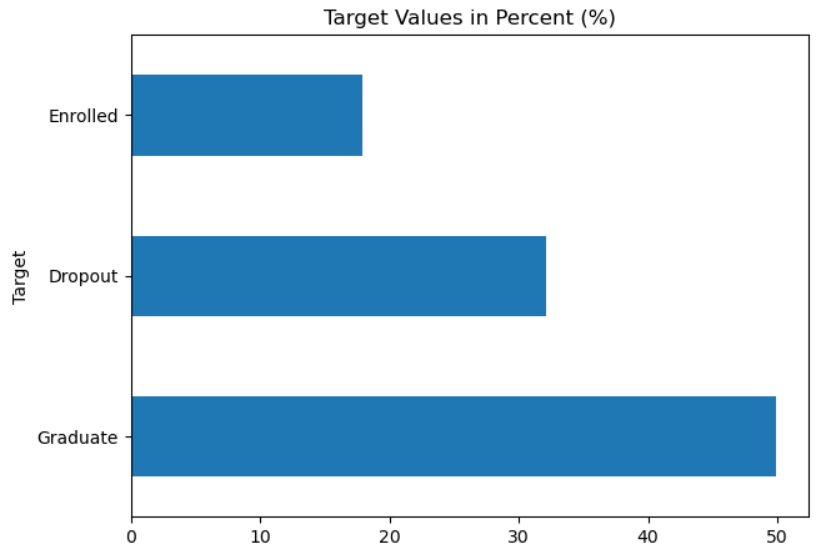
</div>

---
# Data Preparation

In [6]:
df = df.rename(columns = {'Nacionality' : 'Nationality'})

In [7]:
df['Nationality'] = df['Nationality'].replace({6 : 3,11 : 4,13 : 5,14 : 6,17 : 7,21 : 8,22 : 9,24 : 10,25 : 11,26 : 12,32 : 13,
                                              41 : 14,62 : 15,100 : 16,101 : 17, 103 : 18,105 : 19,108 : 20,109 : 21 }) 

## Decoding the Data

In [8]:
df['Marital status'] = df['Marital status'].replace({
1 : 'single', 2 : 'married', 3 : 'widower', 4 : 'divorced', 5 : 'facto union', 6 : 'ligally seperated'})

In [9]:
df['Application mode'] = df['Application mode'].replace({
1 : '1st phase - general contingent', 2 : 'Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island)', 
7 : 'Holders of other higher courses', 10 : 'Ordinance No. 854-B/99', 15 : 'International student (bachelor)', 
16 : '1st phase - special contingent (Madeira Island)', 17 : '2nd phase - general contingent',
18 : '3rd phase - general contingent', 26 : 'Ordinance No. 533-A/99, item b2) (Different Plan)', 
27 : 'Ordinance No. 533-A/99, item b3 (Other Institution)', 39 : 'Over 23 years old', 
42 : 'Transfer', 43 : 'Change of course', 44 : 'Technological specialization diploma holders', 51 : 'Change of institution/course', 
53 : 'Short cycle diploma holders', 57 : 'Change of institution/course (International)'})

In [10]:
df['Course'] = df['Course'].replace({
33 : 'Biofuel Production Technologies', 171 : 'Animation and Multimedia Design', 8014 : 'Social Service (evening attendance)', 
9003 : 'Agronomy 9070 - Communication Design',9085 : 'Veterinary Nursing', 9119 : 'Informatics Engineering', 9130 : 'Equinculture', 
9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500 : 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 
9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

In [11]:
df['Daytime/evening attendance	'] = df['Daytime/evening attendance	'].replace({1 : 'daytime', 0 : 'evening'})

In [12]:
df['Previous qualification'] = df['Previous qualification'].replace({
1 : 'Secondary education', 2 : "Higher education - bachelor's degree", 3 : 'Higher education - degree', 4 : "Higher education - master's",
5 : 'Higher education - doctorate', 6 : 'Frequency of higher education', 9 : '12th year of schooling - not completed', 
10 : '11th year of schooling - not completed', 12 : 'Other - 11th year of schooling', 14 : '10th year of schooling', 
15 : '10th year of schooling - not completed', 19 : 'Basic education 3rd cycle (9th/10th/11th year) or equiv', 
38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv', 39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 
42 : 'Professional higher technical course', 43 : 'Higher education - master (2nd cycle)'})

In [13]:
df['Nationality'] = df['Nationality'].replace({
1 : 'Portuguese', 2 : 'German', 3 : 'Spanish', 4 : 'Italian', 5 : 'Dutch', 6 : 'English', 7 : 'Lithuanian', 8 : 'Angolan', 9 : 'Cape Verdean', 
10 : 'Guinean', 11 : 'Mozambican', 12 : 'Santomean', 13 : 'Turkish', 14 : 'Brazilian', 15 : 'Romanian',16 : 'Moldova (Republic of)', 17 : 'Mexican',
18 : 'Ukrainian', 19 : 'Russian', 20 : 'Cuban', 21 : 'Colombian'})

In [14]:
df["Mother's qualification"] = df["Mother's qualification"].replace({
1 : 'Secondary Education - 12th Year of Schooling or Eq', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree', 
4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education', 
9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)', 
12 : 'Other - 11th Year of Schooling', 14 : '10th Year of Schooling', 18 : 'General commerce course', 
19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv', 22 : 'Technical-professional course', 26 : '7th year of schooling', 
27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling', 
34 : 'Unknown', 35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 
37 : 'Basic education 1st cycle (4th/5th year) or equiv', 38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv', 
39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 41 : 'Specialized higher studies course', 
42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)', 44 : 'Higher Education - Doctorate (3rd cycle)'})

In [15]:
df["Father's qualification"] = df["Father's qualification"].replace({
1 : 'Secondary Education - 12th Year of Schooling or Eq', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree', 
4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education', 
9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)', 
12 : 'Other - 11th Year of Schooling', 14 : '10th Year of Schooling', 18 : 'General commerce course', 
19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv', 22 : 'Technical-professional course', 26 : '7th year of schooling', 
27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling', 
34 : 'Unknown', 35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 
37 : 'Basic education 1st cycle (4th/5th year) or equiv', 38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv', 
39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 41 : 'Specialized higher studies course', 
42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)', 44 : 'Higher Education - Doctorate (3rd cycle)', 
33 : 'Unkown',25 : 'Unknown', 20 : 'Unknown', 13 : 'Unknown', 31 : 'Unknown'})

In [16]:
df["Mother's occupation"] = df["Mother's occupation"].replace({
0 : 'Student', 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
2 : 'Specialists in Intellectual and Scientific Activities', 3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 
5 : 'Personal Services, Security and Safety Workers and Sellers', 6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers', 9 : 'Unskilled Workers', 
10 : 'Armed Forces Professions', 90 : 'Other Situation', 99 : '(blank)', 122 : 'Health professionals', 123 : 'teachers',
125 : 'Specialists in information and communication technologies (ICT)', 131 : 'intermediate level science and engineering technicians and professions',
132 : 'Technicians and professionals, of intermediate level of health', 
134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
141 : 'Office workers, secretaries in general and data processing operators', 
143 : 'Data, accounting, statistical, financial services and registry-related operators', 144 : 'Other administrative support staff',
151 : 'personal service workers', 152 : 'sellers', 153 : 'Personal care workers and the like', 
171 : 'Skilled construction workers and the like, except electricians', 
173 : 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
175 : 'Workers in food processing, woodworking, clothing and other industries and crafts', 191 : 'cleaning workers', 
192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants'})

In [17]:
df["Father's occupation"] = df["Father's occupation"].replace({
0 : 'Student', 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
2 : 'Specialists in Intellectual and Scientific Activities', 3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 
5 : 'Personal Services, Security and Safety Workers and Sellers', 6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers', 9 : 'Unskilled Workers', 
10 : 'Armed Forces Professions', 90 : 'Other Situation', 99 : '(blank)', 122 : 'Health professionals', 123 : 'teachers',
125 : 'Specialists in information and communication technologies (ICT)', 131 : 'intermediate level science and engineering technicians and professions',
132 : 'Technicians and professionals, of intermediate level of health', 
134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
141 : 'Office workers, secretaries in general and data processing operators', 
143 : 'Data, accounting, statistical, financial services and registry-related operators', 144 : 'Other administrative support staff',
151 : 'personal service workers', 152 : 'sellers', 153 : 'Personal care workers and the like', 
171 : 'Skilled construction workers and the like, except electricians', 
173 : 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
175 : 'Workers in food processing, woodworking, clothing and other industries and crafts', 191 : 'cleaning workers', 
192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants', 163 : 'Unknown', 
103 : 'Unknown', 135 : 'Unknown', 181 : 'Unknown', 174 : 'Unknown', 112 : 'Unknown', 101 : 'Unknown', 114 : 'Unknown', 154 : 'Unknown', 
183 : 'Unknown', 102 : 'Unknown', 172 : 'Unknown', 182 : 'Unknown', 195 : 'Unknown', 124 : 'Unknown'})

---
## Methodoligy

A common methodology used when attempting to create a model is `CRISP-DM`, which stands for:

- `CR`oss
- `I`dustry
- `S`tandard
- `p`rocess
- (for)
- `D`ata
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<div>
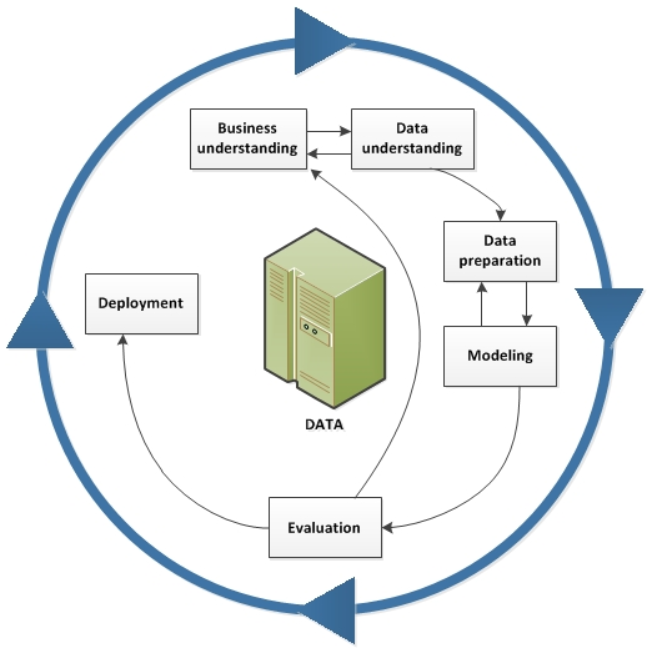
</div>

This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process.

---
# Functions

Here we create some handmade functions to assist with repetitive code blocks. If a code block / section uses a handmade function, there will be a note indicating which one and its purpose.

In [18]:
def get_metrics(y_train, pred):
    '''
    bundles together accuracy, precision, recall and f1 score into one function.
    
    requirements : this function requires 2 inputs, the y_values as dtype(object) and pred as dtype(numpy.ndarry)
    '''   
    
    acc = accuracy_score(y_train, pred)
    prec = precision_score(y_train, pred, average = 'macro', zero_division = np.nan)
    rec = recall_score(y_train, pred, average = 'macro')
    f1 = f1_score(y_train, pred, average = 'macro')
    print('accuracy:', acc)
    print('precision:', prec)
    print('recall:', rec)
    print('f1 score:', f1)

---
# Exploritory Data Analysis (EDA)

Lets dive more into the data we have, and se if we can get a base understanding of what we're working with. This step assists us with the modeling phase, as it allows us to have a deeper understanding of what the results may look like.

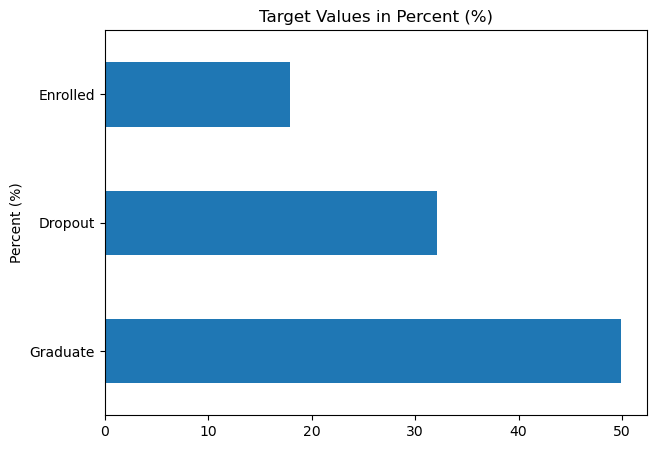

In [19]:
fig, ax = plt.subplots(figsize = (7,5))
target_bar = df['Target'].value_counts(normalize = True) * 100
target_bar.plot(kind = 'barh', rot = 'horizontal')
ax.set_title('Target Values in Percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [20]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

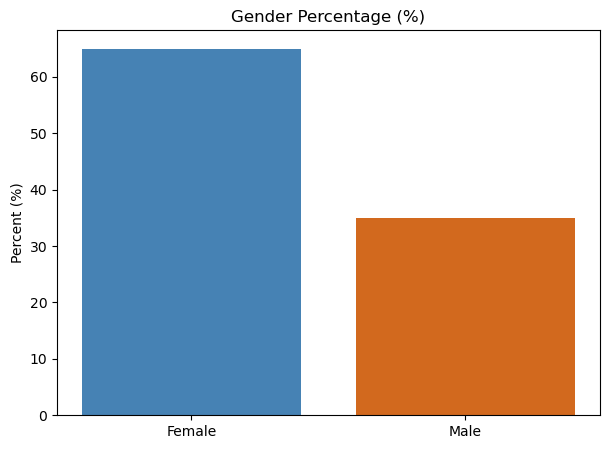

In [21]:
fig, ax = plt.subplots(figsize = (7,5))

categories = ['Female', 'Male']
vals = [65, 35]
colors = ['steelblue', 'chocolate']
plt.bar(categories, vals, color = colors)
ax.set_title('Gender Percentage (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [22]:
df['Gender'].value_counts()

Gender
0    2868
1    1556
Name: count, dtype: int64

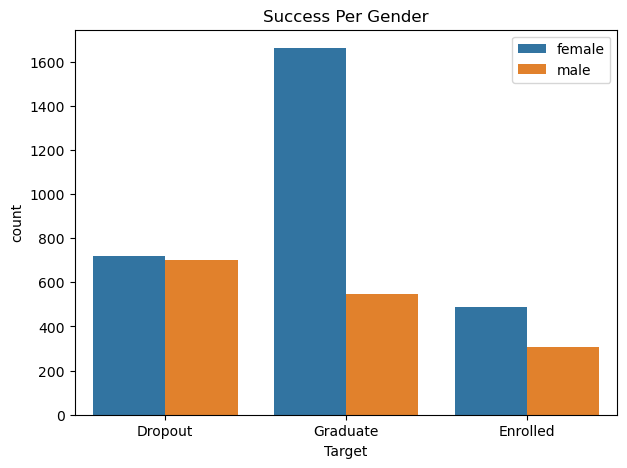

In [23]:
fig, ax = plt.subplots(figsize = (7, 5)) # create figure
sns.countplot(data = df, x = 'Target', hue = 'Gender') # assigns x and y values
ax.set_title('Success Per Gender') # title
labels = ['female', 'male']
plt.legend(labels)
plt.show(); # output

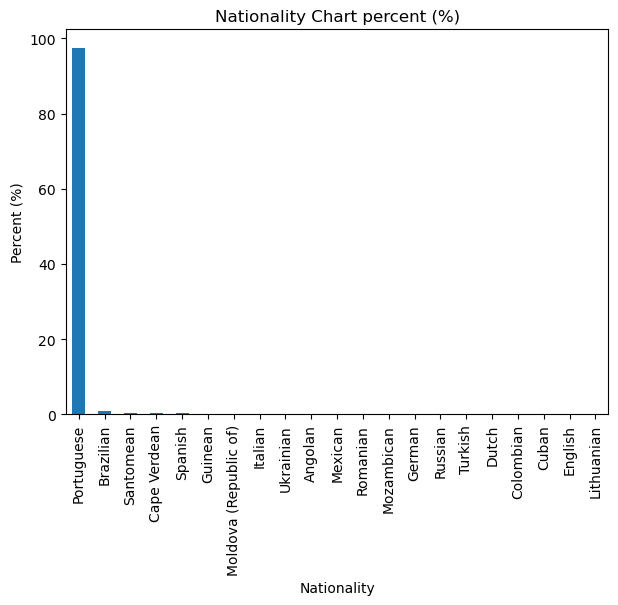

In [24]:
fig, ax = plt.subplots(figsize = (7,5))
nat_bar = df['Nationality'].value_counts() / len(df['Nationality']) * 100
nat_bar.plot(kind = 'bar')
ax.set_title('Nationality Chart percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [25]:
df['Nationality'].value_counts()

Nationality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

In [26]:
len(df['Nationality'])

4424

In [27]:
(4314 / 4414) * 100

97.73448119619393

---
# Model Preparation

In [28]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [29]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [30]:
le = LabelEncoder()
seed = 13
df['Target'] = le.fit_transform(df['Target'])

In [31]:
df['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [32]:
df1 = df[df['Nationality'] == 'Portuguese'].copy()

In [33]:
df1 = df1.drop('Nationality', axis = 1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 0 to 4422
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3544 non-null   object 
 1   Application mode                                3544 non-null   object 
 2   Application order                               3544 non-null   int64  
 3   Course                                          3544 non-null   object 
 4   Daytime/evening attendance	                     3544 non-null   object 
 5   Previous qualification                          3544 non-null   object 
 6   Previous qualification (grade)                  3544 non-null   float64
 7   Mother's qualification                          3544 non-null   object 
 8   Father's qualification                          3544 non-null   object 
 9   Mother's occupation                           

In [35]:
cat_data = ['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification',
          "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]

In [36]:
ohe_df = pd.get_dummies(df1, cat_data, drop_first = True, dtype = int)

In [38]:
y = ohe_df['Target']
x = ohe_df.drop(columns = 'Target', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed)

---
# Modeling

In [39]:
rf = RandomForestClassifier(random_state = seed)

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=13)

In [41]:
pred_rf = rf.predict(x_test)

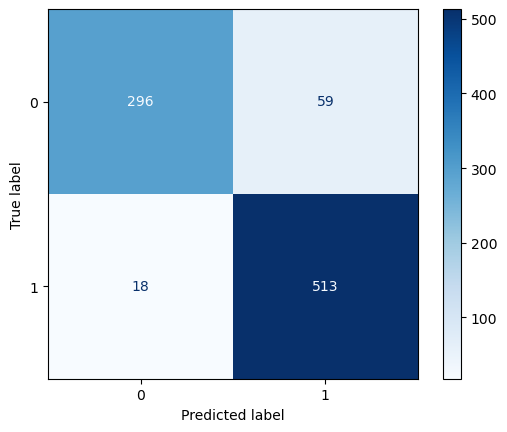

In [42]:
cnf_matrix = confusion_matrix(y_test, pred_rf) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf.classes_) # create plot
disp.plot(cmap=plt.cm.Blues) # output

In [43]:
get_metrics(y_test, pred_rf)

accuracy: 0.9130925507900677
precision: 0.9197641530444078
recall: 0.8999522559083313
f1 score: 0.9075466149528328


In [44]:
pipe = Pipeline([('rfc', RandomForestClassifier(random_state = seed))])

params = [{'rfc__n_estimators' : (300, 400, 1000),
          'rfc__max_depth' : (10, 50, 100),
          'rfc__criterion' : ('gini', 'entropy'),
          'rfc__max_features' : (10, 50, 100)}]

grid = GridSearchCV(pipe, params)

In [45]:
#grid.fit(x_train, y_train)

In [46]:
#grid.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 50,
 'rfc__max_features': 10,
 'rfc__n_estimators': 400}

In [47]:
rf1 = RandomForestClassifier(random_state = seed, criterion = 'entropy', 
                             max_depth = 50, max_features = 10, n_estimators = 400)

In [48]:
rf1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=10,
                       n_estimators=400, random_state=13)

In [49]:
pred_rf1 = rf1.predict(x_test)

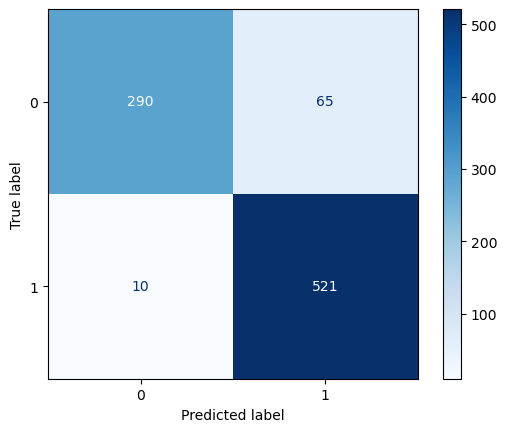

In [50]:
cnf_matrix = confusion_matrix(y_test, pred_rf1) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf1.classes_) # create plot
disp.plot(cmap=plt.cm.Blues) # output

In [51]:
get_metrics(y_test, pred_rf1)

accuracy: 0.9153498871331829
precision: 0.9278725824800911
recall: 0.8990345083684783
f1 score: 0.9091760235636622


In [52]:
rf1.feature_importances_

array([1.08371894e-02, 2.67961248e-02, 3.08225691e-02, 7.00069450e-03,
       8.62987700e-04, 1.69881472e-02, 4.24995559e-02, 1.22406881e-02,
       1.98481467e-02, 3.41799194e-02, 0.00000000e+00, 6.84579201e-03,
       2.09624701e-02, 2.98301757e-02, 9.24903968e-02, 6.64024528e-02,
       4.04935550e-03, 5.71619728e-03, 2.12673673e-02, 3.34794342e-02,
       1.44776220e-01, 8.94113370e-02, 4.67360579e-03, 1.71429381e-02,
       1.67872357e-02, 1.71130721e-02, 3.91740806e-04, 4.74528001e-05,
       2.36001685e-03, 2.74870353e-03, 3.78062258e-05, 1.10938044e-02,
       9.87108590e-04, 4.58370110e-03, 1.57254433e-03, 2.25599785e-03,
       1.09950690e-03, 1.74663682e-03, 6.16149691e-05, 1.06458418e-04,
       0.00000000e+00, 6.04890009e-05, 2.86301889e-05, 8.24895416e-03,
       4.51370124e-04, 1.11073250e-03, 7.37807056e-04, 2.78043334e-03,
       1.43105538e-03, 6.18890645e-03, 4.96609734e-03, 2.58138362e-04,
       2.58367048e-03, 4.36930909e-03, 2.69544138e-03, 2.80072021e-03,
      

In [53]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(7,6))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

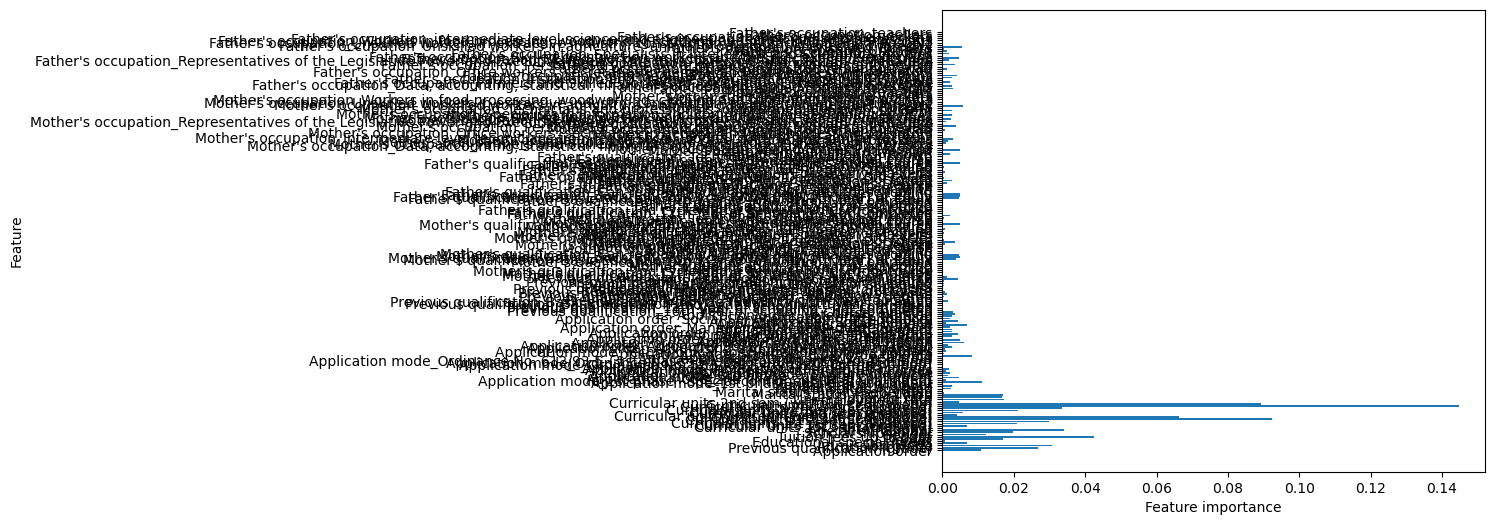

In [54]:
plot_feature_importances(rf1)

---
# The final Model

---
# Conclusion